#LaptopPriceAnalysis

 ## Columns:
 * Company: Laptop Manufacturer.
 * Product: Brand and Model.
 * TypeName: Laptop Type (Notebook, Ultrabook, Gaming, …etc).
 * Inches: Screen Size.
 * Ram:Total amount of RAM in laptop (GBs).
 * OS:Operating System installed.
 * Weight: Laptop Weight in kilograms.
 * Price_euros: Price of Laptop in Euros. (Target)
 * Screen: screen definition (Standard, Full HD, 4K Ultra HD, Quad HD+).
 * ScreenW: screen width (pixels).
 * ScreenH: screen height (pixels).
 * Touchscreen: whether or not the laptop has a touchscreen.
 * IPSpanel: whether or not the laptop has an IPSpanel.
* RetinaDisplay: whether or not the laptop has retina display.
 * CPU_company
 * CPU_freq: frequency of laptop CPU (Hz).
 * CPU_model
 * PrimaryStorage: primary storage space (GB).
 * PrimaryStorageType: primary storage type (HDD, SSD, Flash Storage, Hybrid).
 * SecondaryStorage: secondary storage space if any (GB).
 * SecondaryStorageType: secondary storage type (HDD, SSD, Hybrid, None).
 * GPU_company
 * GPU_model

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

##Load Dataset

In [ ]:
data = pd.read_csv('laptop_prices.csv')
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


##Information about data

In [ ]:
data.isnull().sum()

#no missing values

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
data.shape

(1275, 23)

In [ ]:
data.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [ ]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

##Convert Categorical Columns into Numerical Format

In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

In [ ]:
# List of categorical columns to be encoded
categorical_columns = ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen',
                       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model',
                       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']

In [ ]:
# Apply Label Encoding for categorical columns
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Verify the transformed data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   int64  
 1   Product               1275 non-null   int64  
 2   TypeName              1275 non-null   int64  
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   int64  
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   int64  
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   int64  
 12  IPSpanel              1275 non-null   int64  
 13  RetinaDisplay         1275 non-null   int64  
 14  CPU_company           1275 non-null   int64  
 15  CPU_freq             

##Select Features and Target Variable

In [ ]:
# Define features and target variable
X = data.drop('Price_euros', axis=1)  # All columns except 'Price_euros'
y = data['Price_euros']  # Target variable (Price)

##Split the Data into Training and Testing Sets

In [ ]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f'Training data: {X_train.shape}, Testing data: {X_test.shape}')

Training data: (1020, 22), Testing data: (255, 22)


##Train the Model Using Linear Regression

In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

##Make Predictions on the Test Set

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Check the first few predictions
print(y_pred[:10])

[ 605.1869299   932.67006773 1530.85778203  939.70091451 1831.41210589
  957.45389469  958.51720535  310.09394846 1955.66702779  767.90265741]


##Evaluate the Model

evaluate the model using common regression metrics like Mean Squared Error (MSE) and R-squared (R²).

In [ ]:
# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 128178.69055705023
R-squared (R²): 0.7417518679812334


##Visualize Actual vs. Predicted Prices

* Scatter plot: The blue dots represent the actual vs. predicted price pairs.
* Red dashed line: The line y=x represents perfect predictions, where the predicted value equals the actual value.
* Axes: The x-axis represents the actual prices, and the y-axis represents the predicted prices.

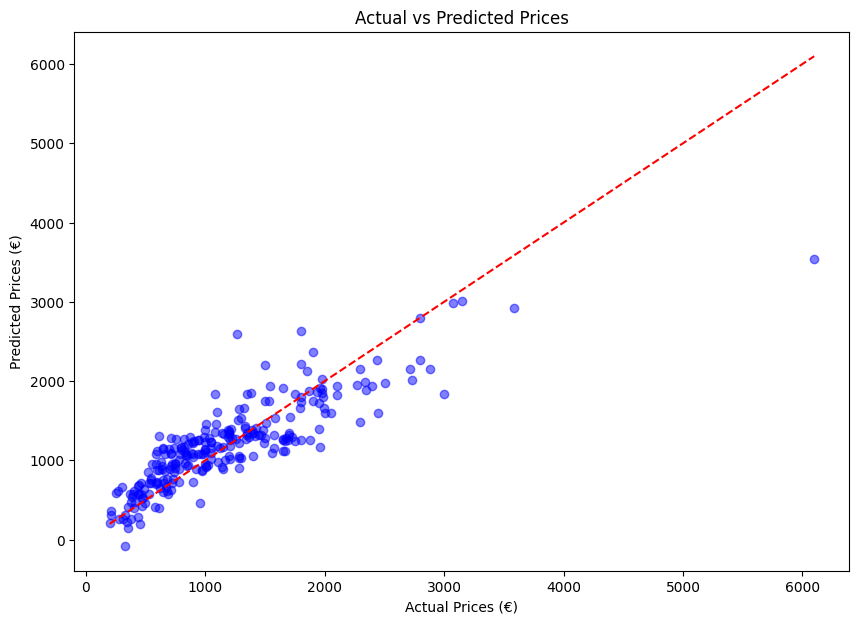

In [ ]:
# Scatter plot to visualize Actual vs Predicted Prices
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line y=x
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices (€)')
plt.ylabel('Predicted Prices (€)')
plt.show()

Accuracy of the Model:

* Ideal Prediction: In an ideal scenario, all points would lie along the red dashed line, indicating that the predicted prices are exactly equal to the actual prices. This would suggest that the model is highly accurate and has no significant errors.
* Deviation from the Line: Points that are closer to the line indicate that the model's predictions are more accurate, while points far from the line represent discrepancies, where the model is either underestimating or overestimating the actual prices.
* A tight cluster of points around the red line suggests that the model is consistent and performs well on most data points.
* Outliers: A few points are significantly far from the red line, which highlights outliers where the model's predictions are substantially inaccurate. These outliers represent laptop models with unique or uncommon features that the model struggles to predict accurately.

##Conclusion:
The model demonstrates a good overall performance, with most predictions falling near the actual prices. However, slight underestimation for high-priced laptops and a few outliers suggest opportunities for further model refinement. Addressing these issues through feature engineering, tuning, or considering more advanced algorithms could enhance the model's accuracy and consistency in predicting laptop prices across all categories.